In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
file_path = "dataset/salaries.csv"  
df = pd.read_csv(file_path)

# Exploring Data

In [3]:
display(df.head(10))
print(df.info())
print('Shaepe of tehe DataFrame (rows/columns):', df.shape)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
5,2024,MI,FT,Consultant,125600,USD,125600,US,0,US,M
6,2024,MI,FT,Manager,246400,USD,246400,US,0,US,M
7,2024,MI,FT,Manager,117300,USD,117300,US,0,US,M
8,2024,MI,FT,Security Engineer,200200,USD,200200,US,0,US,M
9,2024,MI,FT,Security Engineer,190000,USD,190000,US,0,US,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22609 entries, 0 to 22608
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           22609 non-null  int64 
 1   experience_level    22609 non-null  object
 2   employment_type     22609 non-null  object
 3   job_title           22609 non-null  object
 4   salary              22609 non-null  int64 
 5   salary_currency     22609 non-null  object
 6   salary_in_usd       22609 non-null  int64 
 7   employee_residence  22609 non-null  object
 8   remote_ratio        22609 non-null  int64 
 9   company_location    22609 non-null  object
 10  company_size        22609 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.9+ MB
None
Shaepe of tehe DataFrame (rows/columns): (22609, 11)


In [4]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.duplicated().sum()

9333

In [6]:
df = df.drop_duplicates()

In [7]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
5,2024,MI,FT,Consultant,125600,USD,125600,US,0,US,M
6,2024,MI,FT,Manager,246400,USD,246400,US,0,US,M
7,2024,MI,FT,Manager,117300,USD,117300,US,0,US,M
8,2024,MI,FT,Security Engineer,200200,USD,200200,US,0,US,M
9,2024,MI,FT,Security Engineer,190000,USD,190000,US,0,US,M


In [8]:
display(df.describe())
display(df.describe(include = 'object'))

,work_year,salary,salary_in_usd,remote_ratio
count,13276.000000,1.327600e+04,13276.000000,13276.000000
mean,2023.557096,2.336964e+05,142650.373682,28.547755
std,0.865132,6.783702e+06,65424.434329,44.438663
min,2020.000000,1.506100e+04,15061.000000,0.000000
25%,2023.000000,9.600000e+04,95800.000000,0.000000
50%,2024.000000,1.330000e+05,132145.000000,0.000000
75%,2024.000000,1.800000e+05,179431.000000,100.000000
max,2024.000000,6.000000e+08,720000.000000,100.000000


,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,13276,13276,13276,13276,13276,13276,13276
unique,4,4,254,22,79,77,3
top,SE,FT,Security Engineer,USD,US,US,M
freq,7161,13196,2970,12292,11544,11582,11872


# The ratio of work experience and salary

In [9]:
df_sub = df[['work_year', 'salary_in_usd', 'experience_level']].copy()
df_sub.head(10)

,work_year,salary_in_usd,experience_level
0,2024,211000,MI
1,2024,142000,MI
2,2024,80521,MI
3,2024,65730,MI
4,2024,188400,MI
5,2024,125600,MI
6,2024,246400,MI
7,2024,117300,MI
8,2024,200200,MI
9,2024,190000,MI


In [10]:
salary_exp = df_sub.groupby('experience_level')['salary_in_usd'].mean().reset_index()

salary_exp.head(10)

,experience_level,salary_in_usd
0,EN,97518.647552
1,EX,201395.871690
2,MI,125673.922985
3,SE,157577.557464


/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_9346/1923038731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = salary_exp['experience_level'], y = salary_exp['salary_in_usd'], palette = 'plasma')


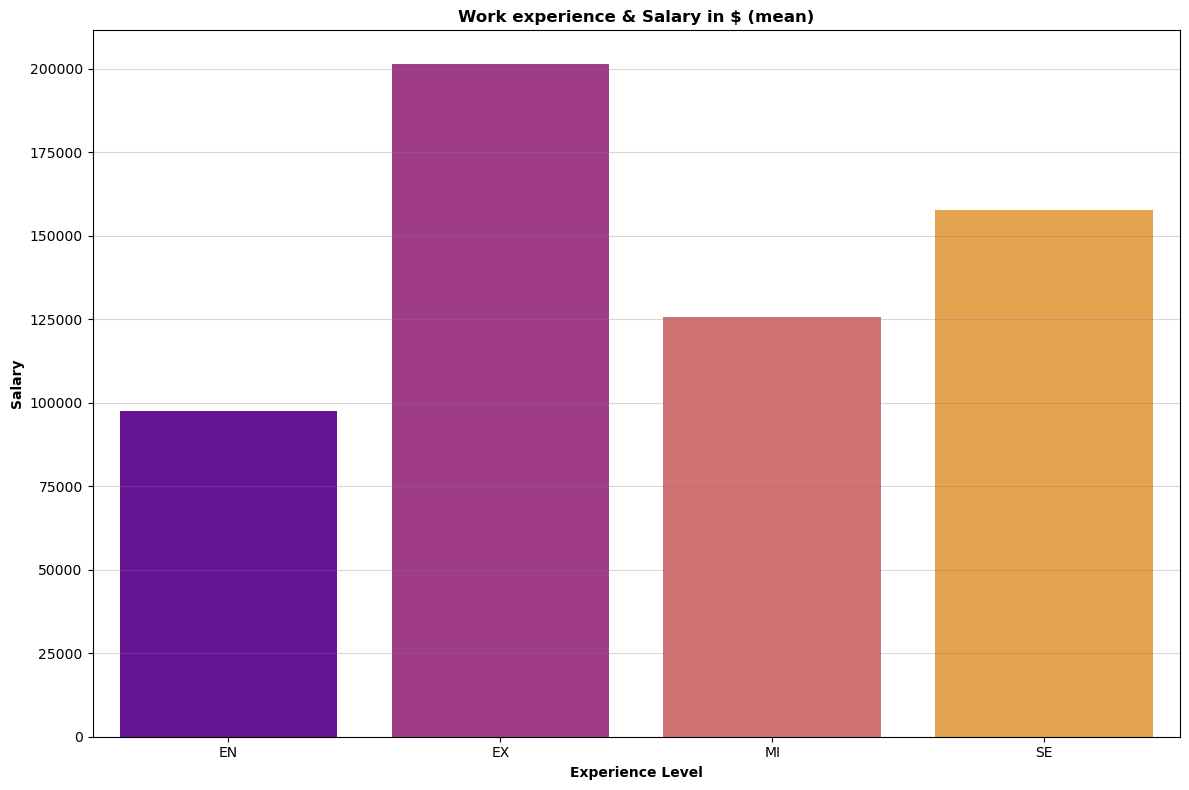

In [11]:
plt.figure(figsize = (12,8))
sns.barplot(x = salary_exp['experience_level'], y = salary_exp['salary_in_usd'], palette = 'plasma')

plt.title('Work experience & Salary in $ (mean)', fontweight = 'bold')
plt.xlabel('Experience Level', fontweight='bold')
plt.ylabel('Salary', fontweight='bold')

plt.grid(True, axis = 'y', color = 'grey', alpha = 0.3)

plt.tight_layout()
plt.show()

In [12]:
salary_exp

,experience_level,salary_in_usd
0,EN,97518.647552
1,EX,201395.871690
2,MI,125673.922985
3,SE,157577.557464


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

salary_exp['experience_level_encoded'] = label_encoder.fit_transform(salary_exp['experience_level'])

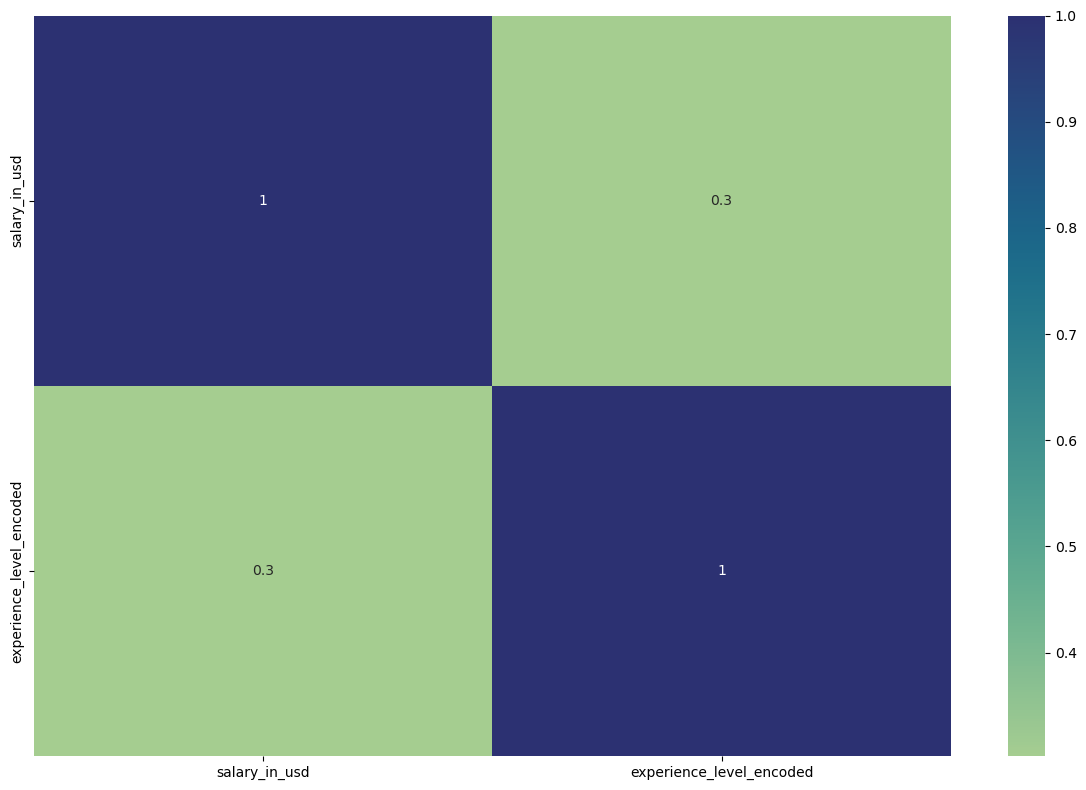

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(salary_exp.corr(numeric_only = True), annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

The correlation value of **0.35** indicates that there is a moderately positive linear relationship between work experience and salary: with increasing experience, on average, there is an increase in salary.

# Forms of work

In [15]:
df_sub2 = df[['employment_type', 'job_title', 'remote_ratio', 'salary']].copy()
df_sub2.head(10)

,employment_type,job_title,remote_ratio,salary
0,FT,Security Consultant,0,211000
1,FT,Security Consultant,0,142000
2,FT,Security Consultant,0,64417
3,FT,Security Consultant,0,52584
4,FT,Consultant,0,188400
5,FT,Consultant,0,125600
6,FT,Manager,0,246400
7,FT,Manager,0,117300
8,FT,Security Engineer,0,200200
9,FT,Security Engineer,0,190000


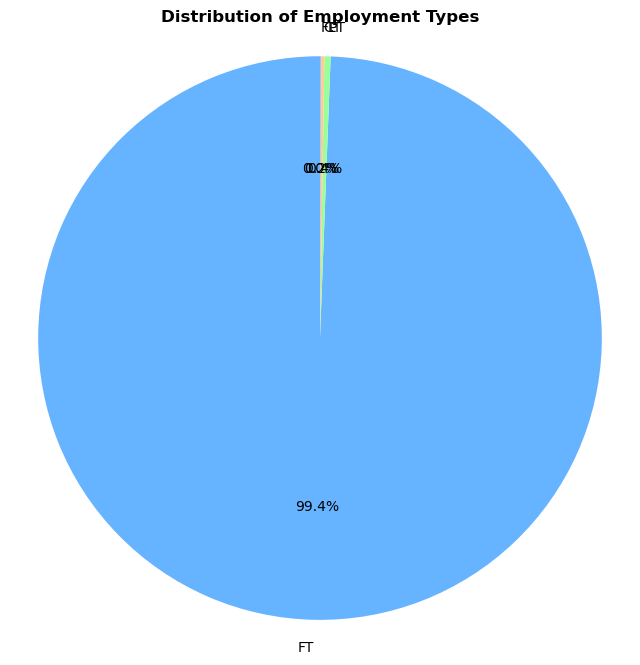

In [16]:
employment_type_counts = df_sub2['employment_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribution of Employment Types', fontweight='bold')

plt.axis('equal')

plt.show()


* **FT** (full-time): Full-time is the most common employment type, with 3068 cases in your dataset.

* **PT** (part-time): Part-time employment is represented in 15 cases. This may indicate that part-time employment is less common than full-time employment.

* **CT** (contract work): Contract work is presented in 12 cases. This may indicate that contract work also has its place in the employment structure.

* **FL** (freelance): Freelance work is presented in 4 cases. This may indicate that freelance work is less common in this dataset, but still represented.

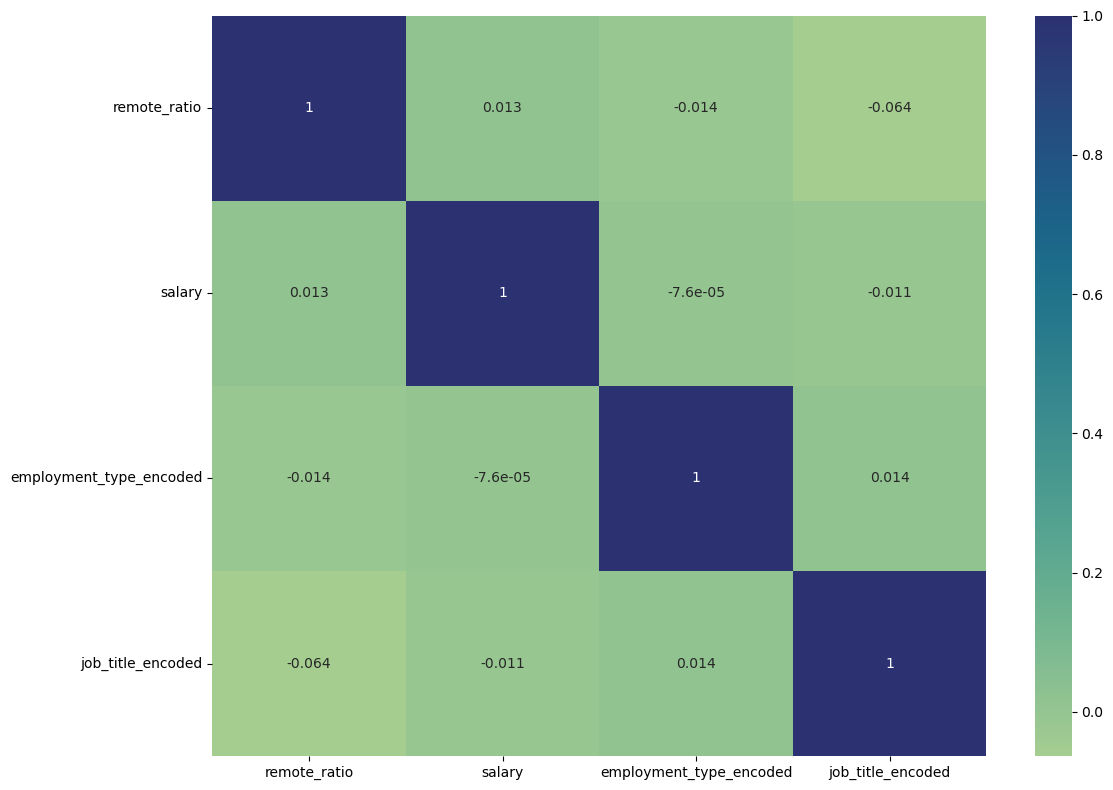

In [17]:
df_sub2['employment_type_encoded'] = label_encoder.fit_transform(df_sub2['employment_type'])
df_sub2['job_title_encoded'] = label_encoder.fit_transform(df_sub2['job_title'])

plt.figure(figsize = (12,8))
sns.heatmap(df_sub2.corr(numeric_only = True), annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

According to the correlation matrix, you can tell that the relationship between remote work, salary, type of employment, and coded position is rather weak in your data. This may indicate that these characteristics may be independent of each other or have other non-linear relationships.

# Location and remote work

In [18]:
df_sub3 = df[['company_location', 'remote_ratio', 'salary_in_usd']].copy()

df_sub3.head(10)

,company_location,remote_ratio,salary_in_usd
0,US,0,211000
1,US,0,142000
2,GB,0,80521
3,GB,0,65730
4,US,0,188400
5,US,0,125600
6,US,0,246400
7,US,0,117300
8,US,0,200200
9,US,0,190000


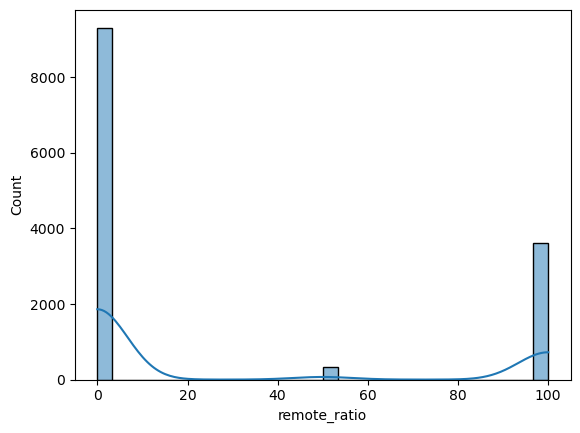

In [19]:
sns.histplot(df_sub3['remote_ratio'], kde = True, bins = 30)

plt.show()

/var/folders/yv/6k4tsllj3vbdbr_6ztp4hw8r0000gn/T/ipykernel_9346/3050009184.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = rem_rat_salaty.index, y = rem_rat_salaty, palette = 'viridis')


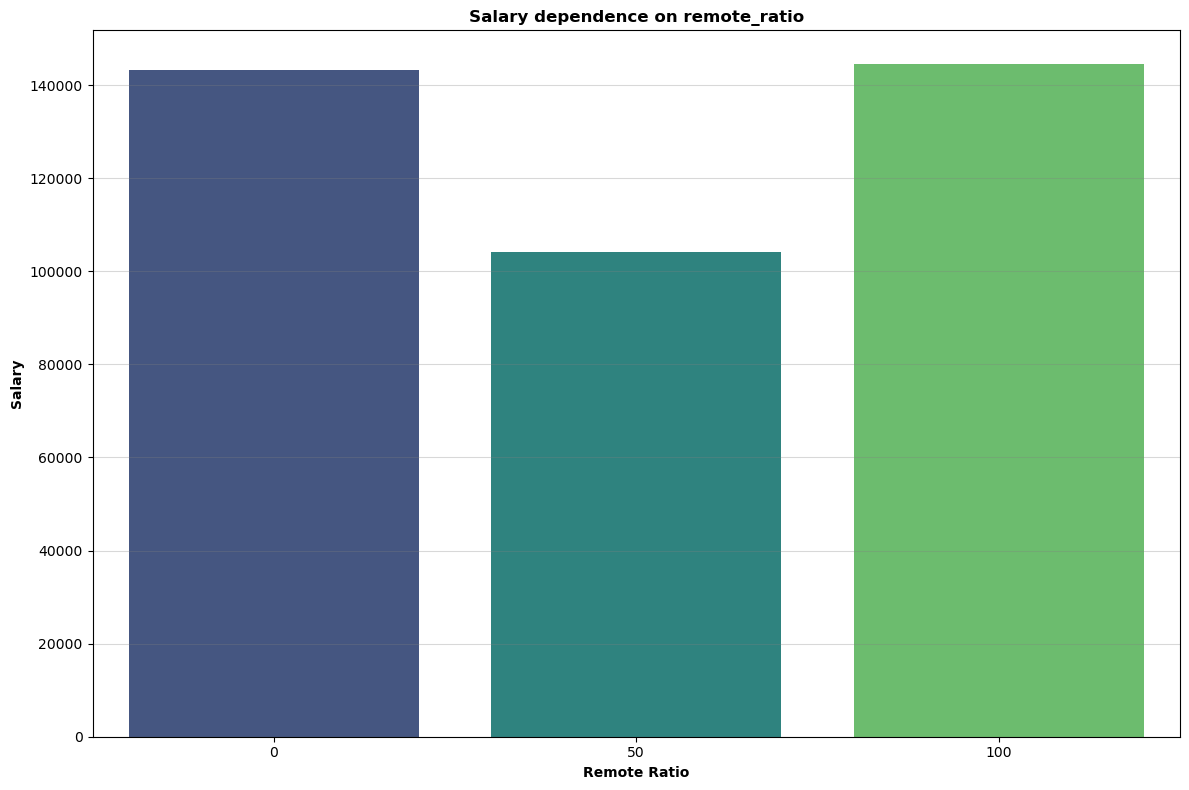

In [20]:
rem_rat_salaty = df_sub3.groupby('remote_ratio')['salary_in_usd'].mean()

plt.figure(figsize = (12,8))
sns.barplot(x = rem_rat_salaty.index, y = rem_rat_salaty, palette = 'viridis')

plt.title('Salary dependence on remote_ratio', fontweight = 'bold')
plt.ylabel('Salary', fontweight = 'bold')
plt.xlabel('Remote Ratio', fontweight = 'bold')

plt.grid(True, axis = 'y', color = 'grey', alpha = 0.3)

plt.tight_layout()
plt.show()

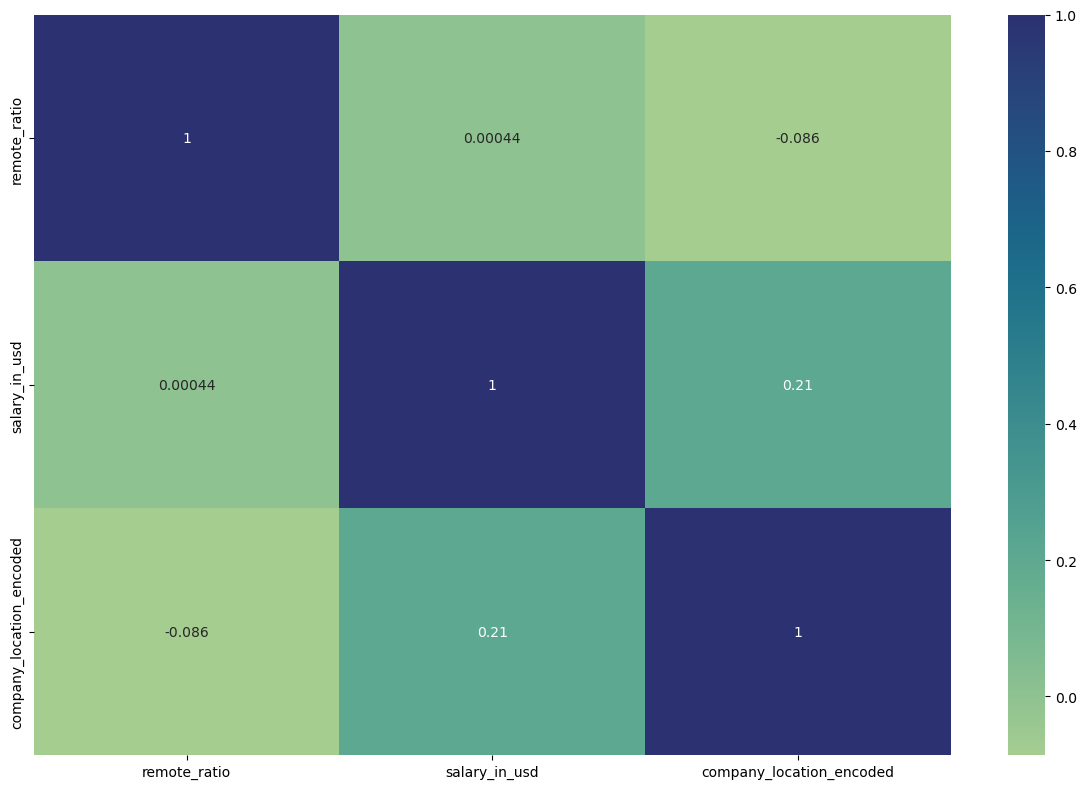

In [21]:
df_sub3['company_location_encoded'] = label_encoder.fit_transform(df_sub3['company_location'])

plt.figure(figsize = (12,8))
sns.heatmap(df_sub3.corr(numeric_only = True), annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

According to the correlation matrix, the relationship between remote work, salary, and company location is rather weak. This may indicate that these characteristics may be independent of each other or have other non-linear relationships.

# Overall correlation

In [22]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Security Consultant,211000,USD,211000,US,0,US,M
1,2024,MI,FT,Security Consultant,142000,USD,142000,US,0,US,M
2,2024,MI,FT,Security Consultant,64417,GBP,80521,GB,0,GB,M
3,2024,MI,FT,Security Consultant,52584,GBP,65730,GB,0,GB,M
4,2024,MI,FT,Consultant,188400,USD,188400,US,0,US,M
5,2024,MI,FT,Consultant,125600,USD,125600,US,0,US,M
6,2024,MI,FT,Manager,246400,USD,246400,US,0,US,M
7,2024,MI,FT,Manager,117300,USD,117300,US,0,US,M
8,2024,MI,FT,Security Engineer,200200,USD,200200,US,0,US,M
9,2024,MI,FT,Security Engineer,190000,USD,190000,US,0,US,M


In [23]:
df_enc = df.copy()

df_enc['job_title'] = label_encoder.fit_transform(df['job_title'])

df_enc['experience_level'] = label_encoder.fit_transform(df['experience_level'])

df_enc['employment_type'] = label_encoder.fit_transform(df['employment_type'])

df_enc['salary_currency'] = label_encoder.fit_transform(df['salary_currency'])
df_enc['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])
df_enc['company_location'] = label_encoder.fit_transform(df['company_location'])

df_enc['company_size'] = label_encoder.fit_transform(df['company_size'])

In [24]:
correlation = df_enc.corr()

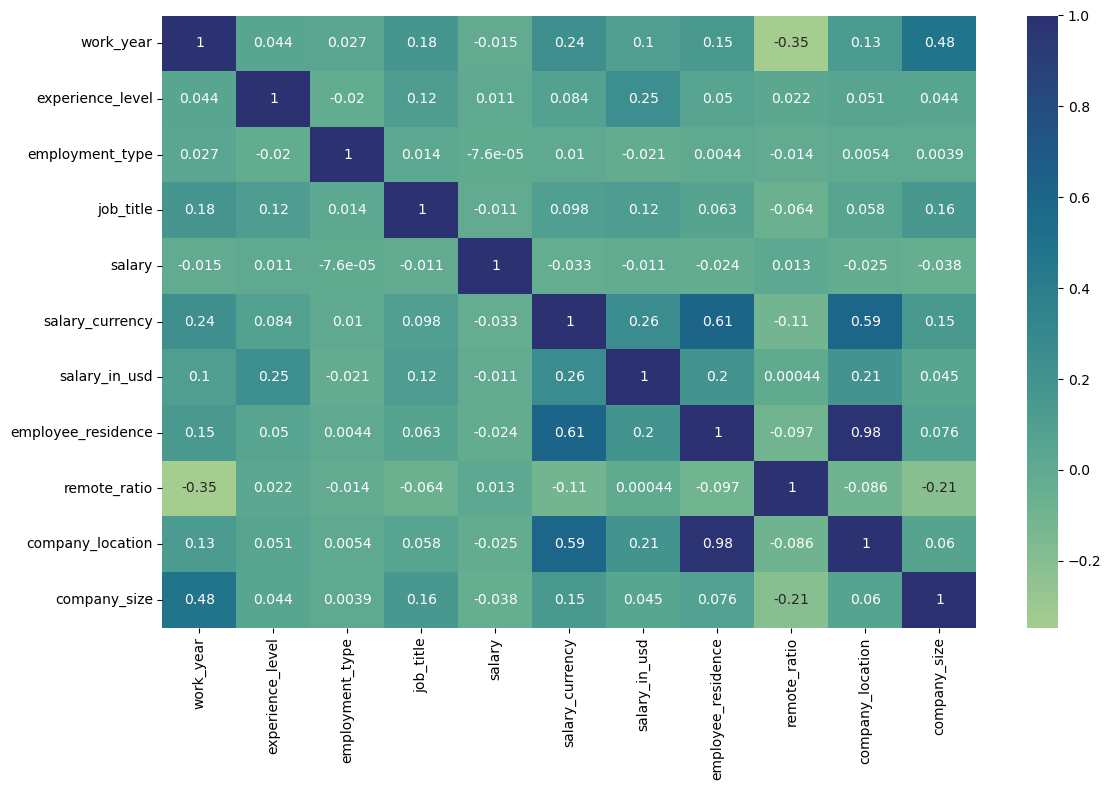

In [25]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = 'crest')

plt.tight_layout()
plt.show()

In [26]:
correlation

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.044315,0.027263,0.178256,-0.015083,0.236286,0.103950,0.148409,-0.346694,0.132956,0.479525
experience_level,0.044315,1.000000,-0.020425,0.120954,0.010902,0.084069,0.247973,0.049898,0.021562,0.050617,0.043889
employment_type,0.027263,-0.020425,1.000000,0.014496,-0.000076,0.010126,-0.020565,0.004371,-0.014494,0.005443,0.003881
job_title,0.178256,0.120954,0.014496,1.000000,-0.010669,0.098147,0.117071,0.062542,-0.063712,0.057921,0.155619
salary,-0.015083,0.010902,-0.000076,-0.010669,1.000000,-0.033163,-0.010931,-0.024177,0.013022,-0.024836,-0.037579
salary_currency,0.236286,0.084069,0.010126,0.098147,-0.033163,1.000000,0.264265,0.609955,-0.105842,0.591427,0.150114
salary_in_usd,0.103950,0.247973,-0.020565,0.117071,-0.010931,0.264265,1.000000,0.202987,0.000443,0.205049,0.044818
employee_residence,0.148409,0.049898,0.004371,0.062542,-0.024177,0.609955,0.202987,1.000000,-0.096864,0.979427,0.076153
remote_ratio,-0.346694,0.021562,-0.014494,-0.063712,0.013022,-0.105842,0.000443,-0.096864,1.000000,-0.086042,-0.209162
company_location,0.132956,0.050617,0.005443,0.057921,-0.024836,0.591427,0.205049,0.979427,-0.086042,1.000000,0.060014


* **Positive correlations:**

1. Work experience (work_year) and company size (company_size_encoded): 0.414918
1. Company size (company_size_encoded) and salary currency (salary_currency_encoded): 0.728411
1. Employee residence (employee_residence_encoded) and company location (company_location_encoded): 0.942170
* **Negative correlations:**

1. Work experience (work_year) and remote work (remote_ratio): -0.250503
1. Company size (company_size_encoded) and remote work (remote_ratio): -0.163147
1. Salary currency (salary_currency_encoded) and remote work (remote_ratio): -0.114102

# Prediction

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

forest1 = RandomForestRegressor()

X = df_enc.drop('salary_in_usd', axis = 1)
y = df_enc['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
forest1.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
forest1.score(X_test, y_test)

0.9962573573327747

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)

random_search = RandomizedSearchCV(forest1, param_distributions=param_dist, scoring=scorer, n_iter=10, cv=5, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("The best parameters:", best_params)

best_model = random_search.best_estimator_

The best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


In [31]:
best_model

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=300)

In [32]:
best_model.fit(X_train, y_train)
predictions2 = best_model.predict(X_test)

In [33]:
best_model.score(X_test, y_test)

0.9954792044566295

In [34]:
mse = mean_squared_error(y_test, predictions2)
mae = mean_absolute_error(y_test, predictions2)

print(f"Root mean square error: {mse}")
print(f"Mean absolute error value (MAE): {mae}")

Root mean square error: 19324083.803918883
Mean absolute error value (MAE): 571.0592295345356
